# Base Predict Code

In [1]:
import os
import torch
import cv2
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=10, 10

In [2]:
from model.build_model import Build_Model
from utils.tools import *
from eval.evaluator import Evaluator
import config.yolov4_config as cfg
from visualize_ import *
from utils.torch_utils import *

In [3]:
# GPU device
# Check GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Device: ", device)

Device:  cpu


In [4]:
model = Build_Model().to(device)

******************** Initing CSPDarknet53 weights ********************
initing Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
initing BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
initing BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
initing BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
initing BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
initing BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
initing BatchNorm2d(64

In [5]:
w_path = './model_.pt'
chkpt = torch.load(os.path.join(w_path),  map_location=torch.device('cpu'))
# chkpt = torch.load(os.path.join(w_path))
# chkpt

In [6]:
model.load_state_dict(chkpt['model'])

<All keys matched successfully>

In [7]:
classes = ['1', '2', '3', '4', '5', '6']

In [8]:
test_path = './data/test'
imgs_path = os.listdir(test_path)
ratio = 0.1

for img_path in imgs_path:
    path = os.path.join(test_path, img_path)
    print(path)
    
    print(img_path)
    
    img = cv2.imread(path)
#     resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
#     resized_img = cv2.resize(img, (450, 450), interpolation=cv2.INTER_AREA)
#     print(img)
    bboxes_prd = Evaluator(model).get_bbox(img, img_path)
#     print(bboxes_prd)
#     print(len(bboxes_prd))
    
    if bboxes_prd.shape[0] != 0:
        boxes = bboxes_prd[..., :4]
        class_inds = bboxes_prd[..., 5].astype(np.int32)
        scores = bboxes_prd[..., 4]
        
        print(boxes.shape)
        print(class_inds.shape)
        print(type(class_inds))
        print(np.unique(class_inds))
        
        print(np.argmax(scores))
        print(class_inds[np.argmax(scores)])

        result = visualize_boxes(
            image=img,
            boxes=boxes,
            labels=class_inds,
            probs=scores,
            class_labels=classes,
        )
        print(result.shape)
        
        cv2.imwrite(test_path + '_pred_' + img_path, result)
        print("Save Image")
        break

./data/test\5d097f47e4b05338ae1764e2.jpg
5d097f47e4b05338ae1764e2.jpg
(12973, 4)
(12973,)
<class 'numpy.ndarray'>
[0 1 2 3 4 5]
30
1
(416, 416, 3)
Save Image


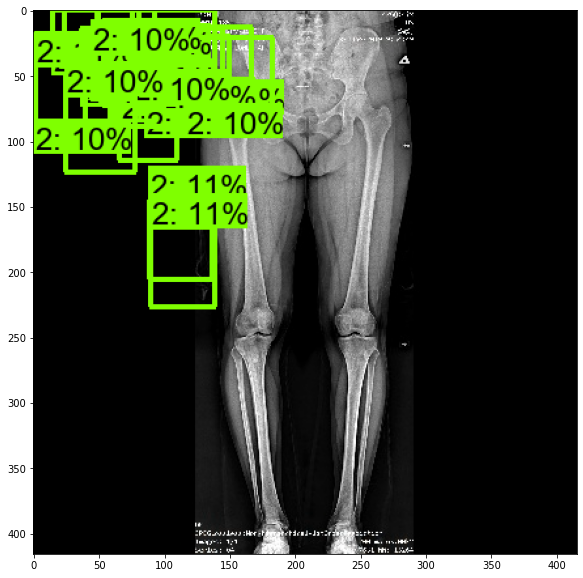

In [9]:
plt.imshow(result)